In [7]:
import pandas as pd
data = pd.read_excel('/home/keeganfl/Downloads/aas9963-table-S4.xlsx', sheet_name=None)

In [19]:
# import plastid
# data structure for mapping read alignments to genomic positions
from plastid import BAMGenomeArray, GenomeArray, VariableFivePrimeMapFactory, \
                        GTF2_TranscriptAssembler, GFF3_TranscriptAssembler, \
                        Transcript, ThreePrimeMapFactory, CenterMapFactory
import plastid
from plastid.plotting.plots import *
import numpy as np
import os
from Bio import SeqIO
import numpy
import math
import pandas as pd
from scipy import stats
from statsmodels.nonparametric.smoothers_lowess import lowess
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import csv
from scipy.sparse.linalg import lsqr

In [9]:
data = data['Sheet1']

In [4]:
# Define the path to our Bam files
data_path = "/home/keeganfl/Desktop/Work_Fall_2021/genomes_&_samples/dmel/"
save_path = "/home/keeganfl/Desktop/Work_Fall_2021/data_tables/TE_tables/dmel/"
p_site_path = "/home/keeganfl/Desktop/Work_Fall_2021/data_tables/p-site_offsets/dmel/"
gtf_name = '"Drosophila_melanogaster.BDGP6.32.103.gtf"'
mutation = 'control'
samp_num = '3'
special = "fc"

In [5]:
df = pd.read_csv(save_path + mutation + '_' + samp_num + '_' + "te_table" + special + ".csv")

In [10]:
ribo_data = data.iloc[list(range(len(data))),list(range(15))] 

In [11]:
ribo_data = ribo_data.iloc[2:-1]

In [12]:
ribo_data.columns = ribo_data.iloc[0]

In [13]:
ribo_data = ribo_data.iloc[1:-1]

In [22]:
ribo_merged = pd.merge(df, ribo_data, how = 'inner', right_on = 'Symbol', left_on = 'gene_name')

In [23]:
ribo_merged = ribo_merged[ribo_merged["ribosome_profiling_rpkm"] < 2000]

(0.0, 5000.0)

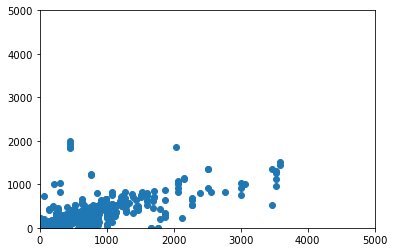

In [25]:
plt.scatter(ribo_merged["GFP"],ribo_merged["ribosome_profiling_rpkm"])
plt.xlim([0,5000])
plt.ylim([0,5000])

In [26]:
RNA_data = data.iloc[list(range(len(data))),[0,1,16,17,18,19,20,21,22,23,24,25,26]] 

In [27]:
RNA_data = RNA_data.iloc[2:-1]

In [28]:
RNA_data.columns = RNA_data.iloc[0]

In [29]:
RNA_data = RNA_data.iloc[1:-1]

In [32]:
RNA_merged = pd.merge(RNA_data, df, how = 'inner', left_on = 'Symbol', right_on = 'gene_name')

(0.0, 2000.0)

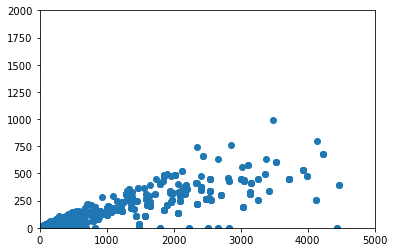

In [33]:
plt.scatter(RNA_merged["mCherry_b"],RNA_merged["RNA-seq_rpkm"])
plt.xlim([0,5000])
plt.ylim([0,2000])

In [216]:
for_ethan = RNA_merged.iloc[list(range(len(RNA_merged))),[1,2,22]]
for_ethan.columns = ["Gene","Ethan_RNA_rpkm", "Keegan_RNA_rpkm"]

In [218]:
for_ethan.to_csv(save_path + "rpkm_comparison")